<a href="https://www.kaggle.com/code/kusumakar/medals-prediction-eda-and-ml?scriptVersionId=203040850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-olympics-medals-vs-gdp/olympics.csv


In [2]:
df = pd.read_csv("/kaggle/input/2024-olympics-medals-vs-gdp/olympics.csv")

In [3]:
df.head()

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


In [4]:
from termcolor import colored


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Total Rows and Columns in the DataFrame </p></div>

In [5]:
rows , cols = df.shape
print(colored("Total Rows are "+str(rows),'blue',attrs=['bold']))
print(colored("Total Columns are "+str(cols),'blue',attrs=['bold']))

Total Rows are 90
Total Columns are 10


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Total missing values </p></div>

In [6]:
from IPython.display import display


missing=pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns=['Column Name','Total Missing Values']
display(missing.style.background_gradient(cmap='plasma'))


,Column Name,Total Missing Values
0,country,0
1,country_code,0
2,region,0
3,gold,0
4,silver,0
5,bronze,0
6,total,0
7,gdp,0
8,gdp_year,0
9,population,0


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Data Types Checks </p></div>

In [7]:
datatypes=pd.DataFrame(df.dtypes).reset_index()
datatypes.columns=['Column Name','DataType']
datatypes

,Column Name,DataType
0,country,object
1,country_code,object
2,region,object
3,gold,int64
4,silver,int64
5,bronze,int64
6,total,int64
7,gdp,float64
8,gdp_year,int64
9,population,float64


<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Country, country_code, region are <u>String Columns </u></p>  <br> 
<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Gold,Silver,Bronze,Total,GDP,GDP_Year,Population  are <u>Numeric Columns</u> </p>  <br> 


</div>

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Checking the Categorical and Discreet Values </p>
<br>
 <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> We will check this by counting unique values. If total unique values in a column &lt 10 else Discreet </p>
</div>

In [8]:
categorical = [x for x in df if len(df[x].unique())<10 or df[x].dtype=='object']
discreet = [x for x in df if len(df[x].unique())>10 and df[x].dtype!='object']
print(colored("Total Categorical Columns  -  "+str(categorical),"blue"))
print(colored("Total Discreet Columns  -  "+str(discreet),"blue"))

Total Categorical Columns  -  ['country', 'country_code', 'region', 'gdp_year']
Total Discreet Columns  -  ['gold', 'silver', 'bronze', 'total', 'gdp', 'population']


<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Country,Country_code,Region,GDP_Year are categorical Columns </p>  <br> 
<p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Gold,Silver,Bronze,Total,GDP,Population  are Discreet Columns </p>  <br> 


</div>

In [9]:
df[categorical]

,country,country_code,region,gdp_year
0,United States,USA,North America,2023
1,China,CHN,Asia,2023
2,Japan,JPN,Asia,2023
3,Australia,AUS,Oceania,2023
4,France,FRA,Europe,2023
...,...,...,...,...
85,Peru,PER,South America,2023
86,Qatar,QAT,Asia,2022
87,Singapore,SGP,Asia,2023
88,Slovakia,SVK,Europe,2023


In [10]:
df[discreet]

,gold,silver,bronze,total,gdp,population
0,40,44,42,126,81695.19,334.9
1,40,27,24,91,12614.06,1410.7
2,20,12,13,45,33834.39,124.5
3,18,19,16,53,64711.77,26.6
4,16,26,22,64,44460.82,68.2
...,...,...,...,...,...,...
85,0,0,1,1,7789.87,34.4
86,0,0,1,1,87480.42,2.7
87,0,0,1,1,84734.26,5.9
88,0,0,1,1,24470.24,5.4


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">  Exploratory Data Analysis </p>

</div>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color:#1a4f76; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 1em; text-indent: 20px;color:white">  Total Medals Earned Country Wise </p>

</div>

/tmp/ipykernel_17/2749505627.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=df.groupby("country").agg({"total":sum}).reset_index().sort_values(by='total',ascending=False)


<Axes: title={'center': 'Country Vs Total Medals Earned'}, xlabel='country', ylabel='total'>

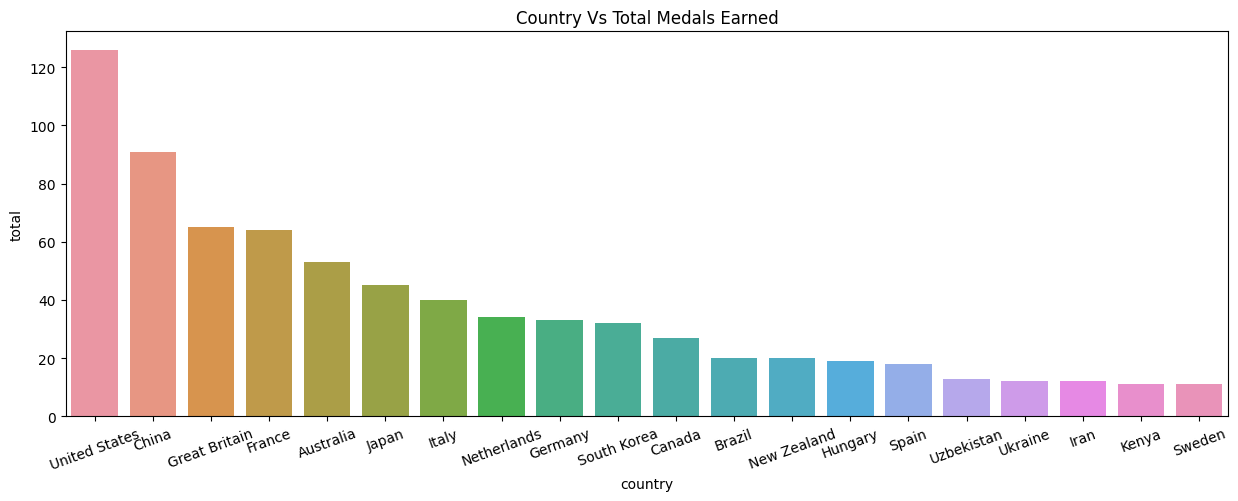

In [12]:
df1=df.groupby("country").agg({"total":sum}).reset_index().sort_values(by='total',ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=20)
plt.title("Country Vs Total Medals Earned")
sns.barplot(x='country',y='total',data=df1.head(20))


<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> The above graph shows the top countries who have earned medals ( Gold + Silver + Bronze )</p> 
</div>

<div style="background-color:#1a4f76; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 1em; text-indent: 20px;color:white">  Is there any relation between Population Vs Total Medals Earned? </p>

</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


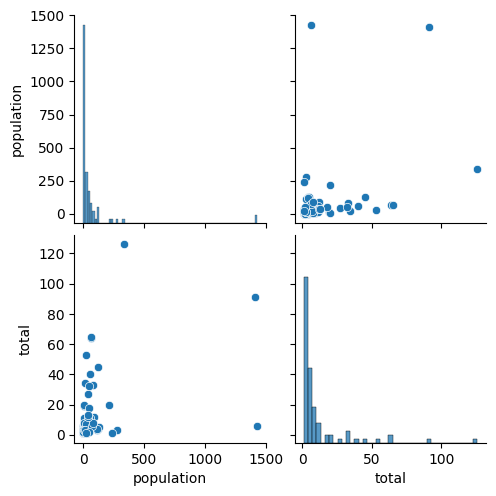

In [13]:
df2=df.groupby("country").agg({"population":"sum","total":"sum"}).reset_index()
sns.pairplot(df2[['population','total']])

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> The above graph shows the impact of population on total medals. While most of the population is less than 500, we see higher number of medals earned as the population increases. For highly populated countries ( around 1500 population ) we have greater number of Medals Earned</p> 
</div>

<div style="background-color:#1a4f76; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 1em; text-indent: 20px;color:white">  Is there any relation between GDP Vs Total Medals Earned? </p>

</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


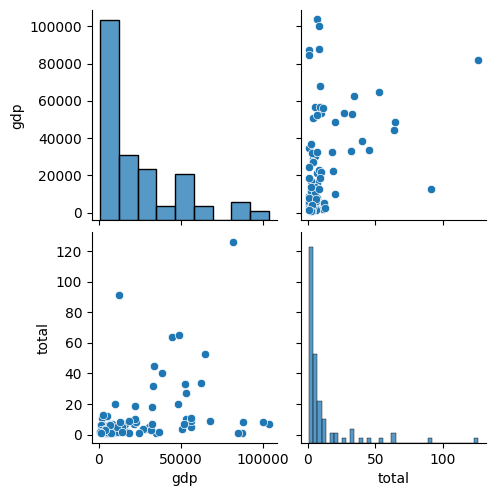

In [14]:
df2=df.groupby("country").agg({"total":"sum","gdp":"sum"}).reset_index()
sns.pairplot(df2[['gdp','total']])

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> The above graph shows the impact of GDP on total medals. Greater the value of GDP, greater the number of medals earned, showing a positive impact.</p> 
</div>

<div style="background-color:#1a4f76; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 1em; text-indent: 20px;color:white">  Check for collinearity in Numerical Columns </p>

</div>

<Axes: >

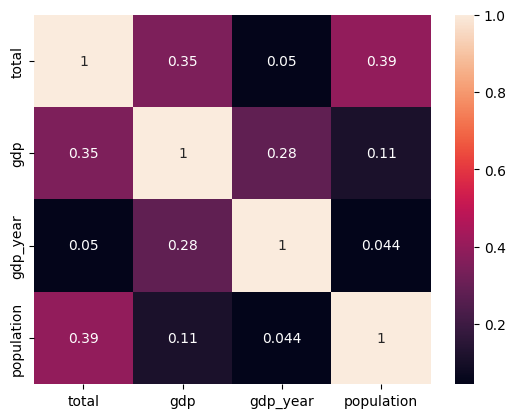

In [15]:
sns.heatmap(df[['total','gdp','gdp_year','population'] ].corr().abs(),annot=True)

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> The above heatmap shows that none of the features are tightly correlated.</p> 
</div>

<div style="background-color:#05313d; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white">  Let's define the problem Statement.</p>
      
   
   <p style="color:yellow"> Given an year, current population, country name, and current GDP, how many medals can the country win?</p>
 
</div>

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">  Data Standardization and Encoding</p>

</div>

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> We will encode the country column, and Standardize GDP, Population Column
         </p> 
</div>

In [16]:
df.head()

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Let's select the features and Target Variable to Predict
         </p> 
</div>

In [18]:
countries_df=pd.get_dummies(df,columns=['country'])
countries_df

,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population,country_Albania,...,country_Taiwan,country_Tajikistan,country_Thailand,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_United States,country_Uzbekistan,country_Zambia
0,USA,North America,40,44,42,126,81695.19,2023,334.9,False,...,False,False,False,False,False,False,False,True,False,False
1,CHN,Asia,40,27,24,91,12614.06,2023,1410.7,False,...,False,False,False,False,False,False,False,False,False,False
2,JPN,Asia,20,12,13,45,33834.39,2023,124.5,False,...,False,False,False,False,False,False,False,False,False,False
3,AUS,Oceania,18,19,16,53,64711.77,2023,26.6,False,...,False,False,False,False,False,False,False,False,False,False
4,FRA,Europe,16,26,22,64,44460.82,2023,68.2,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,PER,South America,0,0,1,1,7789.87,2023,34.4,False,...,False,False,False,False,False,False,False,False,False,False
86,QAT,Asia,0,0,1,1,87480.42,2022,2.7,False,...,False,False,False,False,False,False,False,False,False,False
87,SGP,Asia,0,0,1,1,84734.26,2023,5.9,False,...,False,False,False,False,False,False,False,False,False,False
88,SVK,Europe,0,0,1,1,24470.24,2023,5.4,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
countries_df.drop(columns=['gold','silver','bronze','region','country_code'],axis=1,inplace=True)
countries_df

,total,gdp,gdp_year,population,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,country_Austria,...,country_Taiwan,country_Tajikistan,country_Thailand,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_United States,country_Uzbekistan,country_Zambia
0,126,81695.19,2023,334.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,91,12614.06,2023,1410.7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45,33834.39,2023,124.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,53,64711.77,2023,26.6,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,64,44460.82,2023,68.2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,7789.87,2023,34.4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86,1,87480.42,2022,2.7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87,1,84734.26,2023,5.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,1,24470.24,2023,5.4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
final_df= countries_df
X = final_df.drop(columns=['total'],axis=1)
Y = final_df['total']

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Split the data to Test and Train Set
         </p> 
</div>

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Standardise and Encode the values
         </p> 
</div>

In [22]:
transformer = ColumnTransformer([
    
    ("scaler",StandardScaler(),['gdp','population']),
    
])

In [23]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">  Model Training and Predictions</p>

</div>

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import warnings

In [25]:
# Lets suppress the warnings during model training to keep the notebook clean :) 
warnings.filterwarnings('ignore')

In [26]:
models = {"Random Forest Regressor":RandomForestRegressor(),
         "Decision Tree Regressor":DecisionTreeRegressor(),
         "Linear Regressor":LinearRegression(),
         "XGBoost Regression":XGBRegressor()}

In [27]:
r2_scores=[]
mean_squared = []
mean_absolute = []
model_list =[]
for model_name,model in models.items():
    model.fit(X_train_transformed,y_train)
    ypred = model.predict(X_test_transformed)
    r2_scores.append(r2_score(y_test,ypred))
    mean_squared.append(mean_squared_error(y_test,ypred))
    mean_absolute.append(mean_absolute_error(y_test,ypred))
    model_list.append(model_name)
    

In [28]:
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores
accuracy_data ['Mean Squared Errors']=mean_squared
accuracy_data['Mean Absolute Errors']=mean_absolute
accuracy_data

,Model,R2 Score,Mean Squared Errors,Mean Absolute Errors
0,Random Forest Regressor,0.426305,424.798752,9.680435
1,Decision Tree Regressor,0.110308,658.782609,12.173913
2,Linear Regressor,-0.108581,820.860969,16.613262
3,XGBoost Regression,0.100852,665.784396,12.434250


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">  Hyper Parameter Tuning</p>

</div>

<div style="background-color:#cbb9aa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Out of all the models, Random Forest Performs better. We will use this model and tune it to get the best estimates and check the final scores
         </p> 
</div>

In [29]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],  # Number of trees
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in each leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered for splitting
    'bootstrap': [True, False],  # Bootstrap sampling
}
warnings.filterwarnings('ignore')


rf_random_search = RandomizedSearchCV(
    estimator=models["Random Forest Regressor"],
    param_distributions=param_grid,
    n_iter=100,  # Number of random configurations to try
    cv=5,  # 5-fold cross-validation
   
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
rf_random_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters
print("Best parameters found: ", rf_random_search.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [30]:
ypred = rf_random_search.fit(X_train_transformed, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [31]:
best_rf = rf_random_search.best_estimator_
best_rf.fit(X_train_transformed,y_train)
ypred = best_rf.predict(X_test_transformed)

In [32]:
print(colored("R2 SCORE : "+str(r2_score(y_test,ypred)),"green"))
print(colored("MEAN ABSOLUTE ERROR : "+str(mean_absolute_error(y_test,ypred)),"red"))
print(colored("MEAN SQUARED ERROR : "+str(mean_squared_error(y_test,ypred)),"red"))



R2 SCORE : 0.4018669576386944
MEAN ABSOLUTE ERROR : 10.270713559387476
MEAN SQUARED ERROR : 442.89433879979737
